In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [10]:
# 1. Load Data
# We use try-except to handle path differences between local and cloud envs
try:
    df = pd.read_csv('../data/raw/data.csv')
    print("Data loaded successfully.")
except FileNotFoundError:
    print("Error: data.csv not found. Please ensure it is in data/raw/")

Data loaded successfully.


In [11]:
# 2. Overview & Summary Statistics
print("Data Shape:", df.shape)
print("\nData Info:")
print(df.info())
print("\nSummary Statistics:")
print(df.describe())

Data Shape: (95662, 16)

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-nu

In [12]:
# 3. Missing Values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
TransactionId           0
BatchId                 0
AccountId               0
SubscriptionId          0
CustomerId              0
CurrencyCode            0
CountryCode             0
ProviderId              0
ProductId               0
ProductCategory         0
ChannelId               0
Amount                  0
Value                   0
TransactionStartTime    0
PricingStrategy         0
FraudResult             0
dtype: int64


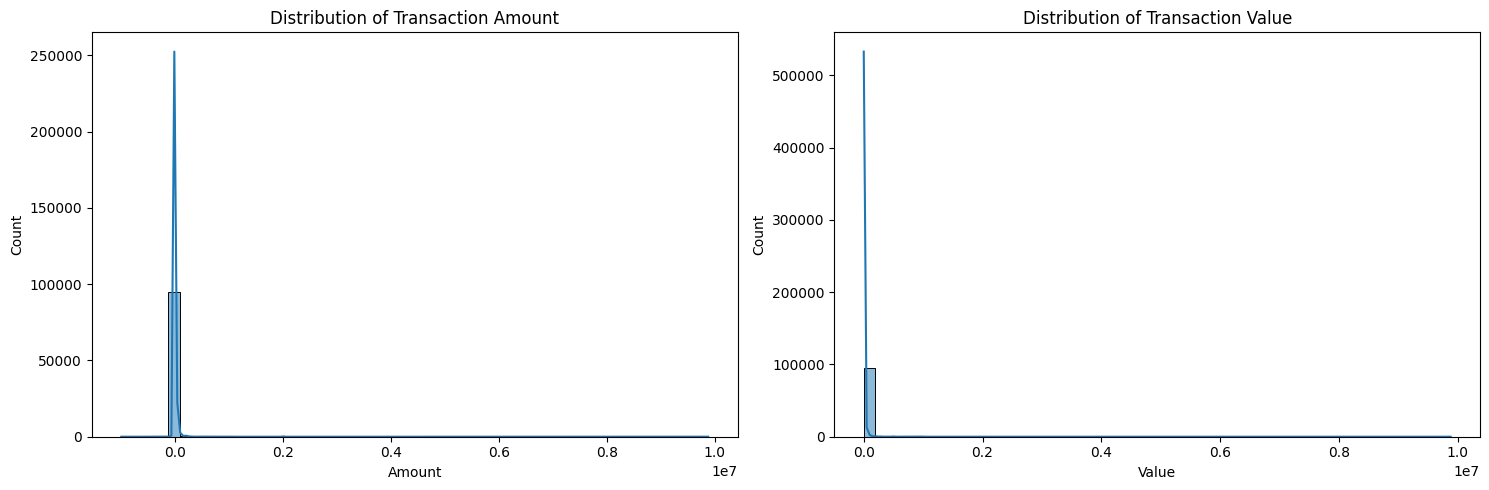

In [13]:
# 4. Numerical Distribution (Amount & Value)
# Identifying Skewness
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.histplot(df['Amount'], bins=50, kde=True, ax=axes[0])
axes[0].set_title('Distribution of Transaction Amount')
sns.histplot(df['Value'], bins=50, kde=True, ax=axes[1])
axes[1].set_title('Distribution of Transaction Value')
plt.tight_layout()
plt.show()

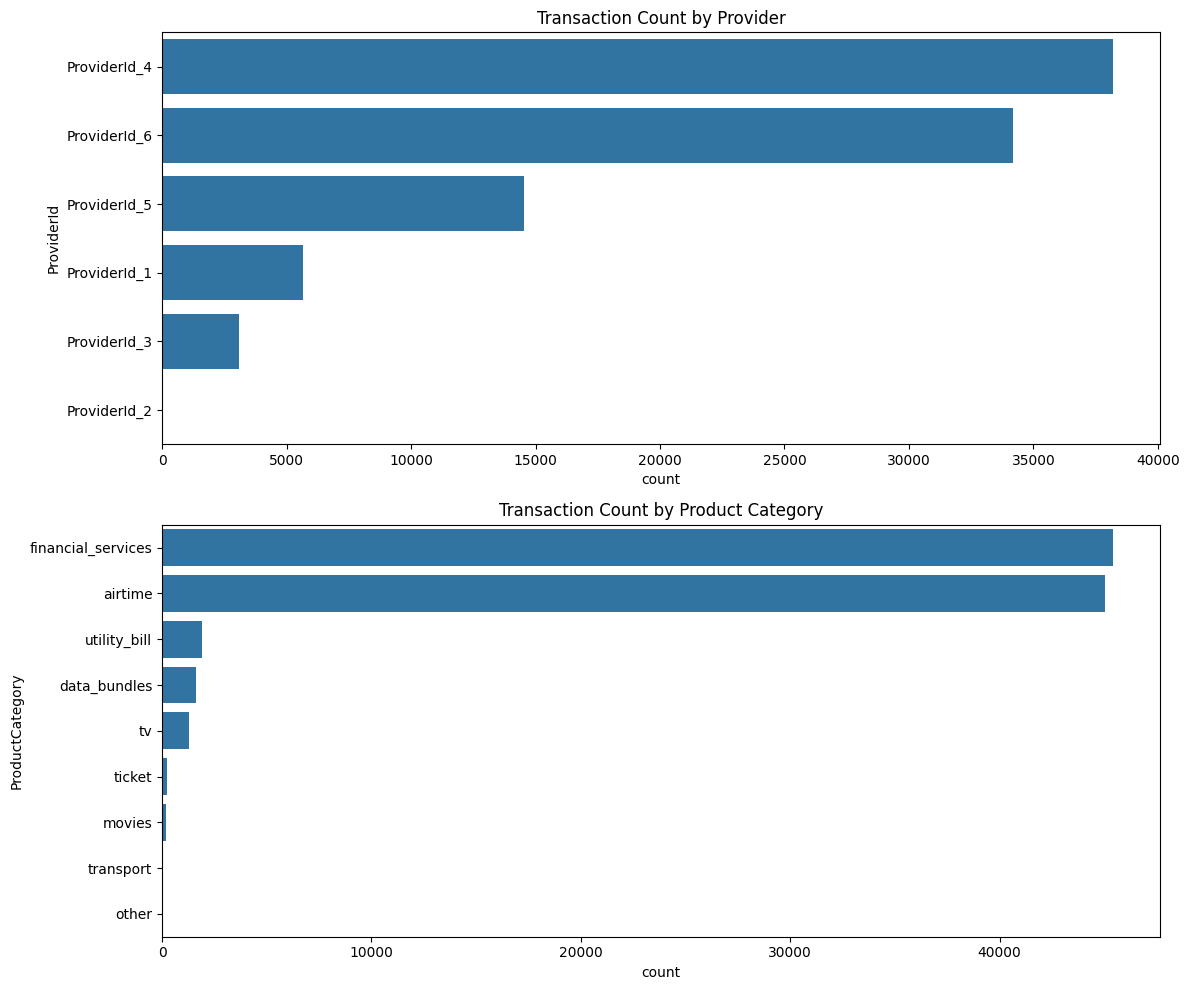

In [14]:
# 5. Categorical Analysis
# Analyzing dominant providers and channels
fig, axes = plt.subplots(2, 1, figsize=(12, 10))
sns.countplot(y=df['ProviderId'], order=df['ProviderId'].value_counts().index, ax=axes[0])
axes[0].set_title('Transaction Count by Provider')
sns.countplot(y=df['ProductCategory'], order=df['ProductCategory'].value_counts().index, ax=axes[1])
axes[1].set_title('Transaction Count by Product Category')
plt.tight_layout()
plt.show()


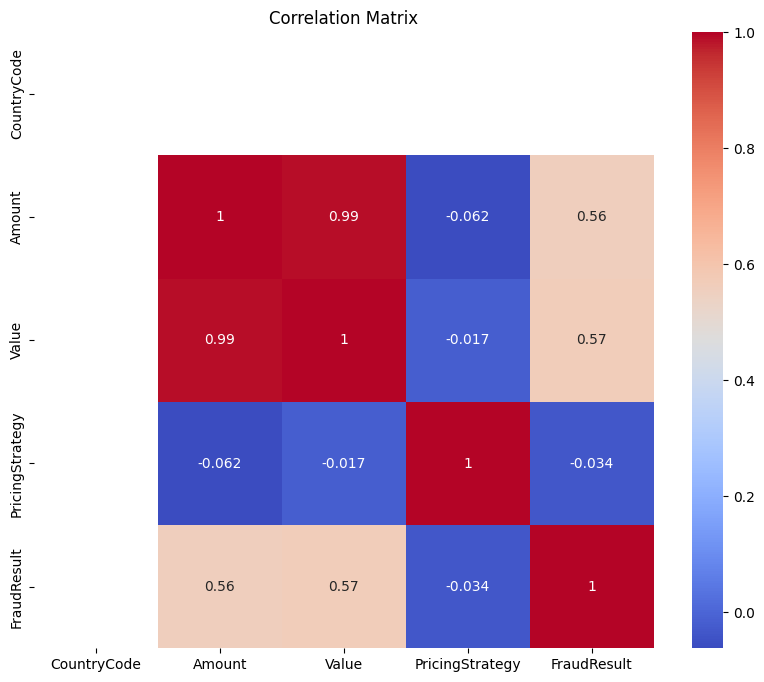

In [15]:
# 6. Correlation Analysis
# Checking for multicollinearity between Amount and Value
plt.figure(figsize=(10, 8))
numeric_df = df.select_dtypes(include=['float64', 'int64'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

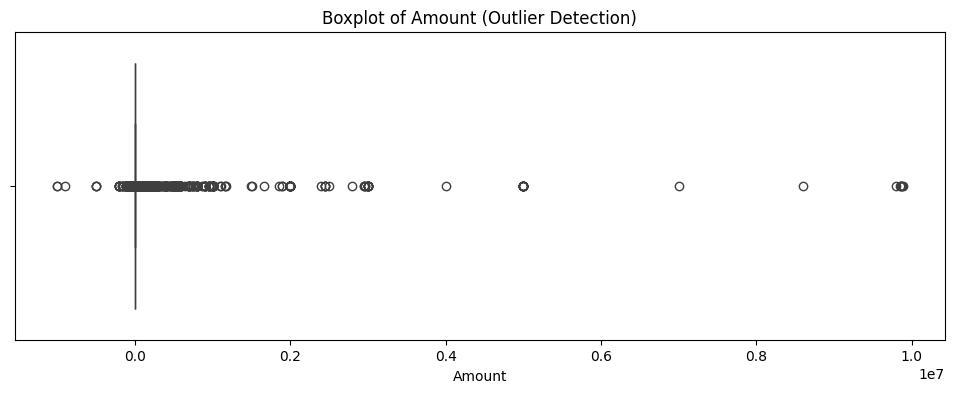

In [16]:
# 7. Outlier Detection
plt.figure(figsize=(12, 4))
sns.boxplot(x=df['Amount'])
plt.title('Boxplot of Amount (Outlier Detection)')
plt.show()